In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Load dataset
df = pd.read_csv(r'C:\Users\Rohit\Downloads\pharmacy_otc_sales_data.csv')

In [5]:

# Basic info
print(df.head())
print(df.info())
print(df.describe())

         Date              Product  Sales Person  Boxes Shipped  Amount ($)  \
0  2022-02-06  Pain Relief Tablets   Divya Mehra              7       67.43   
1  2022-02-05     Antiseptic Cream  Nikhil Batra             18      421.46   
2  2022-02-19          Cough Syrup   Ritika Shah              2       48.25   
3  2022-03-28  Pain Relief Tablets  Nikhil Batra              5       59.89   
4  2022-01-17     Digestive Enzyme   Ritika Shah              8      147.73   

     Country  
0  Australia  
1     Canada  
2         UK  
3         UK  
4        USA  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           333 non-null    object 
 1   Product        333 non-null    object 
 2   Sales Person   333 non-null    object 
 3   Boxes Shipped  333 non-null    int64  
 4   Amount ($)     333 non-null    float64
 5   Country        333

In [6]:

# Check for nulls
print(df.isnull().sum())

Date             0
Product          0
Sales Person     0
Boxes Shipped    0
Amount ($)       0
Country          0
dtype: int64


In [10]:
# Clean any extra spaces
df['Date'] = df['Date'].astype(str).str.strip()

# Convert columns safely
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # invalid dates become NaT
df['Boxes Shipped'] = pd.to_numeric(df['Boxes Shipped'], errors='coerce') # invalid numbers become NaN
df['Amount ($)'] = pd.to_numeric(df['Amount ($)'], errors='coerce')       # invalid numbers become NaN

# Optional: check which rows failed
print(df[df['Date'].isna()])


    Date              Product  Sales Person  Boxes Shipped  Amount ($)  \
2    NaT          Cough Syrup   Ritika Shah              2       48.25   
3    NaT  Pain Relief Tablets  Nikhil Batra              5       59.89   
4    NaT     Digestive Enzyme   Ritika Shah              8      147.73   
6    NaT     Antiseptic Cream  Nikhil Batra              3       50.35   
7    NaT            Eye Drops   Ritika Shah             13      282.43   
..   ...                  ...           ...            ...         ...   
320  NaT  Pain Relief Tablets  Nikhil Batra              9      188.06   
323  NaT     Antiseptic Cream  Nikhil Batra              5      120.28   
326  NaT     Antiseptic Cream  Nikhil Batra              4       73.27   
329  NaT        Allergy Pills    Aman Verma              3       52.50   
330  NaT          Nasal Spray   Divya Mehra              5       65.67   

       Country  
2           UK  
3           UK  
4          USA  
6    Australia  
7          USA  
..       

In [11]:
# Total sales per product
product_sales = df.groupby('Product')['Amount ($)'].sum().sort_values(ascending=False)


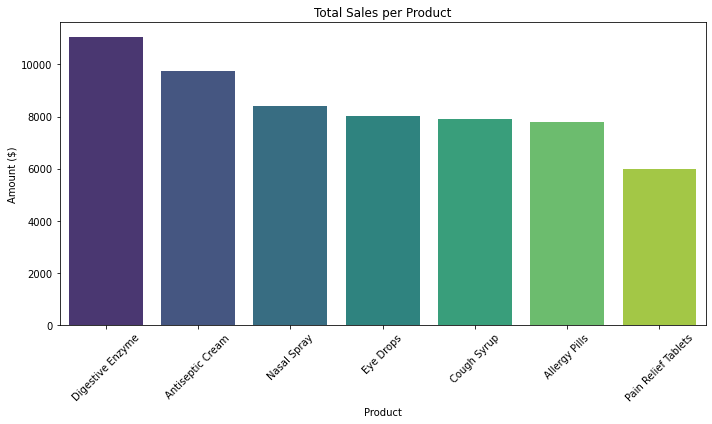

In [12]:
# Plot total sales per product
plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Sales per Product')
plt.ylabel('Amount ($)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

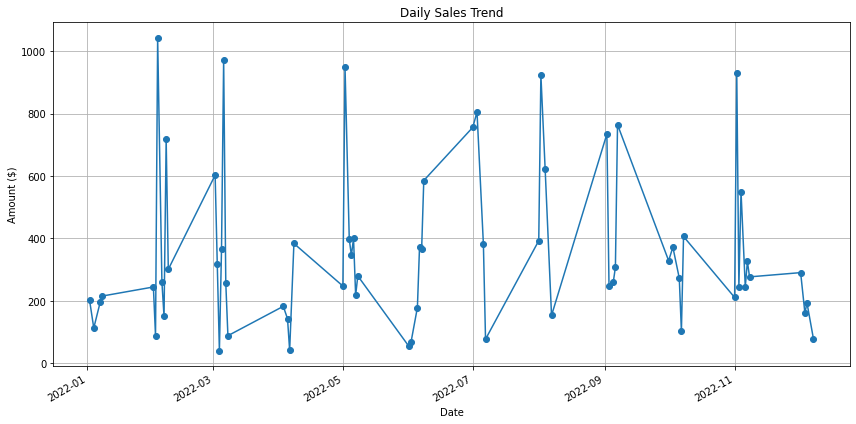

In [13]:
# Sales trend over time
daily_sales = df.groupby('Date')['Amount ($)'].sum()
plt.figure(figsize=(12,6))
daily_sales.plot(marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

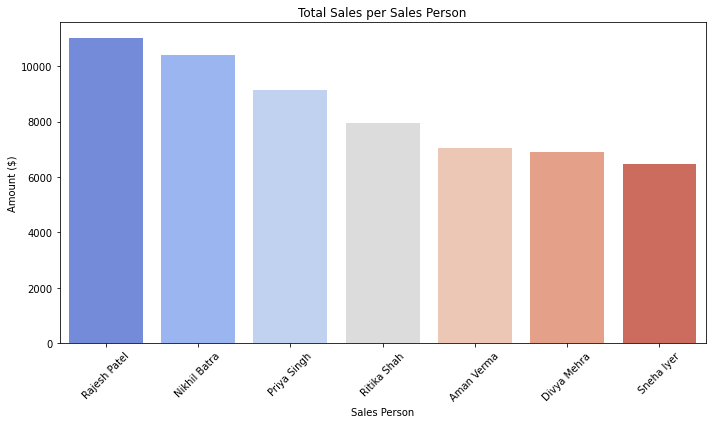

In [14]:
# Sales per Sales Person
salesperson_sales = df.groupby('Sales Person')['Amount ($)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=salesperson_sales.index, y=salesperson_sales.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Total Sales per Sales Person')
plt.ylabel('Amount ($)')
plt.xlabel('Sales Person')
plt.tight_layout()
plt.show()

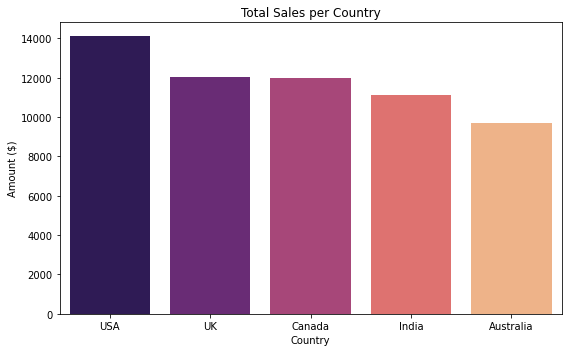

In [15]:

# Country-wise sales
country_sales = df.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='magma')
plt.title('Total Sales per Country')
plt.ylabel('Amount ($)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()
